In [56]:
from fastapi import FastAPI
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score
import pickle

df_EUROSTAT = pd.read_csv("EUROSTAT/data/serie/serie_EU.csv")
df_GTREND = pd.read_csv('GTrends/data/final/gtrend_monthly_2017.csv')
df_GDELT = pd.read_csv('GDELT/data/final/gdelt_monthly.csv')
data = pd.concat([df_GTREND, df_GDELT], axis=1)
data.drop("Media",axis=1, inplace=True)
data = data.set_index("Date")
# nota, cambiar la fecha (se ve mal al concatenar)

In [3]:
len(data.columns)

25

In [4]:
data.columns

Index(['Media_Education_busqueda_mensual',
       'Media_Investments_busqueda_mensual', 'Media_Jobs_busqueda_mensual',
       'Media_Mortage_busqueda_mensual',
       'Media_Unemployement_benefits_busqueda_mensual',
       'Media_Unemployments_busqueda_mensual',
       'Media_Welfare_busqueda_mensual',
       'Media_Investments_busqueda_mensual.1', 'Media_Jobs_busqueda_mensual.1',
       'Media_Mortage_busqueda_mensual.1',
       'Media_Unemployement_benefits_busqueda_mensual.1',
       'Media_Unemployments_busqueda_mensual.1',
       'Media_Welfare_busqueda_mensual.1', 'Media_volumen_intensity_Education',
       'Media_Volume_intensity_Enterprise',
       'Media_Volume_intensity_Financial_inclusion',
       'Media_Volume_intensity_Health_Service',
       'Media_Volume_intensity_Inclusive_Growth',
       'Media_Volume_intensity_Social_inclusion',
       'Media_average_tone_Education',
       'Media_Average_tone_Enterprise_Development',
       'Media_Average_tone_Financial_Inclusion',
 

In [5]:
data

,Media_Education_busqueda_mensual,Media_Investments_busqueda_mensual,Media_Jobs_busqueda_mensual,Media_Mortage_busqueda_mensual,Media_Unemployement_benefits_busqueda_mensual,Media_Unemployments_busqueda_mensual,Media_Welfare_busqueda_mensual,Media_Investments_busqueda_mensual.1,Media_Jobs_busqueda_mensual.1,Media_Mortage_busqueda_mensual.1,...,Media_Volume_intensity_Financial_inclusion,Media_Volume_intensity_Health_Service,Media_Volume_intensity_Inclusive_Growth,Media_Volume_intensity_Social_inclusion,Media_average_tone_Education,Media_Average_tone_Enterprise_Development,Media_Average_tone_Financial_Inclusion,Media_Average_tone_Health_Service,Media_Average_tone_Inclusive_Growth,Media_Average_tone_Social_inclusion
Date,,,,,,,,,,,,,,,,,,,,,
"(2017-01-31, 2017-01-31 00:00:00+00:00)",34.526316,31.052632,70.631579,5.368421,7.263158,45.000000,0.000000,31.052632,70.631579,5.368421,...,0.000400,0.032663,0.001526,0.016526,-4.047779,3.672095,0.955005,-3.134963,0.792732,0.280137
"(2017-02-28, 2017-02-28 00:00:00+00:00)",34.000000,33.236842,68.526316,10.052632,11.263158,34.157895,0.000000,33.236842,68.526316,10.052632,...,0.000300,0.029216,0.000989,0.013747,-4.251689,4.221805,3.418921,-3.644742,3.066589,0.669737
"(2017-03-31, 2017-03-31 00:00:00+00:00)",36.210526,34.131579,66.421053,15.368421,8.631579,45.631579,4.333333,34.131579,66.421053,15.368421,...,0.000495,0.037516,0.001384,0.019537,-9.263563,5.326442,5.087337,-10.663121,7.076711,3.958305
"(2017-04-30, 2017-04-30 00:00:00+00:00)",30.894737,31.500000,60.157895,9.000000,6.052632,39.473684,0.000000,31.500000,60.157895,9.000000,...,0.000542,0.033011,0.001689,0.017421,-1.940011,3.883058,3.712237,-4.871816,2.563179,2.432684
"(2017-05-31, 2017-05-31 00:00:00+00:00)",33.263158,31.868421,61.578947,5.157895,3.105263,41.578947,0.000000,31.868421,61.578947,5.157895,...,0.000563,0.051711,0.007711,0.018816,-2.871253,4.308063,0.567563,-22.223179,1.172721,5.180226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(2023-08-31, 2023-08-31 00:00:00+00:00)",33.842105,35.657895,69.368421,27.368421,4.736842,34.736842,6.400000,35.657895,69.368421,27.368421,...,0.000505,0.036768,0.000895,0.026026,2.699911,0.972653,1.639584,-2.553526,1.921889,3.748800
"(2023-09-30, 2023-09-30 00:00:00+00:00)",81.210526,38.947368,73.578947,22.000000,17.947368,38.421053,11.200000,38.947368,73.578947,22.000000,...,0.000600,0.053237,0.001153,0.032379,1.873968,1.947374,2.527058,-2.279511,4.693637,2.865300
"(2023-10-31, 2023-10-31 00:00:00+00:00)",69.684211,40.052632,71.052632,16.368421,14.947368,36.315789,0.000000,40.052632,71.052632,16.368421,...,0.000958,0.067684,0.000800,0.029032,0.847111,2.966500,4.077995,-3.398916,3.051705,5.063089


In [6]:
index_original = data.index # OJO, HACEMOS ESTO PORQUE LUEGO AL MONTAR LAGGED DATA EL INDICE SE PIERDE, COMPROBADO AL ESCALAR

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

lag_steps = 3

lagged_data = pd.DataFrame(scaled_data,index=index_original,columns=data.columns) # uno nuevo con los datos escalados, PERO OJO, NO TIENE INDICE
for column in lagged_data.columns:
    # Aplicar lag desplazando cada columna hacia abajo por el número de pasos de tiempo especificado
    for step in range(1, lag_steps + 1):
        lagged_data[f"{column}_lag{step}"] = lagged_data[column].shift(step) # si lo quisieramos para arriba, -step
        
# y eliminamos las 3 primeras columnas con nulo (o lo sustituimos), consultar
lagged_data.dropna(inplace=True)
# IMPORTANTE, PLANTEARNOS SI SUBIRNOS O BAJARNOS

In [7]:
lagged_data

,Media_Education_busqueda_mensual,Media_Investments_busqueda_mensual,Media_Jobs_busqueda_mensual,Media_Mortage_busqueda_mensual,Media_Unemployement_benefits_busqueda_mensual,Media_Unemployments_busqueda_mensual,Media_Welfare_busqueda_mensual,Media_Investments_busqueda_mensual.1,Media_Jobs_busqueda_mensual.1,Media_Mortage_busqueda_mensual.1,...,Media_Average_tone_Financial_Inclusion_lag3,Media_Average_tone_Health_Service_lag1,Media_Average_tone_Health_Service_lag2,Media_Average_tone_Health_Service_lag3,Media_Average_tone_Inclusive_Growth_lag1,Media_Average_tone_Inclusive_Growth_lag2,Media_Average_tone_Inclusive_Growth_lag3,Media_Average_tone_Social_inclusion_lag1,Media_Average_tone_Social_inclusion_lag2,Media_Average_tone_Social_inclusion_lag3
Date,,,,,,,,,,,,,,,,,,,,,
"(2017-04-30, 2017-04-30 00:00:00+00:00)",0.098756,0.256983,0.480634,0.230337,0.168375,0.218143,0.000000,0.256983,0.480634,0.230337,...,0.132385,0.692767,0.858267,0.870288,0.927275,0.399991,0.101006,0.464591,0.245990,0.220092
"(2017-05-31, 2017-05-31 00:00:00+00:00)",0.131675,0.283054,0.528169,0.093633,0.086384,0.246940,0.000000,0.283054,0.528169,0.093633,...,0.495531,0.829331,0.692767,0.858267,0.333799,0.927275,0.399991,0.363179,0.464591,0.245990
"(2017-06-30, 2017-06-30 00:00:00+00:00)",0.068764,0.296089,0.485915,0.408240,0.191801,0.133909,0.000000,0.296089,0.485915,0.408240,...,0.741432,0.420171,0.829331,0.692767,0.150970,0.333799,0.927275,0.545816,0.363179,0.464591
"(2017-07-31, 2017-07-31 00:00:00+00:00)",0.004389,0.000000,0.556338,0.076779,0.020498,0.045356,0.000000,0.000000,0.556338,0.076779,...,0.538762,0.633254,0.420171,0.829331,1.000000,0.150970,0.333799,0.449291,0.545816,0.363179
"(2017-08-31, 2017-08-31 00:00:00+00:00)",0.030724,0.301676,0.614437,0.264045,0.147877,0.010799,0.000000,0.301676,0.614437,0.264045,...,0.075282,0.790843,0.633254,0.420171,0.318482,1.000000,0.150970,0.310105,0.449291,0.545816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(2023-08-31, 2023-08-31 00:00:00+00:00)",0.139722,0.551210,0.788732,0.883895,0.131772,0.153348,0.571429,0.551210,0.788732,0.883895,...,0.236061,0.955383,1.000000,0.923682,0.063787,0.256111,0.150089,0.649320,0.676277,0.546207
"(2023-09-30, 2023-09-30 00:00:00+00:00)",0.798098,0.783985,0.929577,0.692884,0.499268,0.203744,1.000000,0.783985,0.929577,0.692884,...,0.453909,0.883999,0.955383,1.000000,0.249477,0.063787,0.256111,0.450665,0.649320,0.676277
"(2023-10-31, 2023-10-31 00:00:00+00:00)",0.637893,0.862197,0.845070,0.492509,0.415813,0.174946,0.000000,0.862197,0.845070,0.492509,...,0.319490,0.890460,0.883999,0.955383,0.613929,0.249477,0.063787,0.391936,0.450665,0.649320


In [8]:
lagged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, ('2017-04-30', '2017-04-30 00:00:00+00:00') to ('2023-12-31', '2023-12-31 00:00:00+00:00')
Data columns (total 100 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Media_Education_busqueda_mensual                      81 non-null     float64
 1   Media_Investments_busqueda_mensual                    81 non-null     float64
 2   Media_Jobs_busqueda_mensual                           81 non-null     float64
 3   Media_Mortage_busqueda_mensual                        81 non-null     float64
 4   Media_Unemployement_benefits_busqueda_mensual         81 non-null     float64
 5   Media_Unemployments_busqueda_mensual                  81 non-null     float64
 6   Media_Welfare_busqueda_mensual                        81 non-null     float64
 7   Media_Investments_busqueda_mensual.1                  81 non-null 

In [9]:
X = lagged_data.values

In [10]:
df_EUROSTAT # AHORA MANIPULAMOS LA Y, DE EUROSTAT

,year_month,total
0,2017-03-01,212800.8
1,2017-06-01,215840.8
2,2017-09-01,219059.4
3,2017-12-01,220487.7
4,2018-03-01,221984.1
5,2018-06-01,226911.9
6,2018-09-01,227300.1
7,2018-12-01,228923.4
8,2019-03-01,229417.1
9,2019-06-01,233126.9


In [11]:
# Cambiamos el nombre de la columna "year_month" a "Date", para que se llame como las de X
df_EUROSTAT.rename(columns={'year_month': 'Date'}, inplace=True)
df_EUROSTAT['Date'] = pd.to_datetime(df_EUROSTAT['Date'])
df_EUROSTAT.set_index('Date', inplace=True)

# Rellenamos los valores faltantes de los meses anteriores con el mes siguiente
df_EUROSTAT_RES = df_EUROSTAT.resample('M').ffill()
df_EUROSTAT_RES
# Plantearnos si es mejor el bfill hasta enero en lugar de ir para abajo, pues de las otras series tenemos datos
# hasta enero

,total
Date,
2017-03-31,212800.8
2017-04-30,212800.8
2017-05-31,212800.8
2017-06-30,215840.8
2017-07-31,215840.8
...,...
2023-08-31,267535.4
2023-09-30,268847.7
2023-10-31,268847.7


In [35]:
# con el bfill
# Reindexar el DataFrame para incluir todos los meses desde el inicio hasta el final
start_date = df_EUROSTAT.index.min().to_period('M')
end_date = df_EUROSTAT.index.max().to_period('M')
new_index = pd.period_range(start=start_date, end=end_date, freq='M')
df1 = df_EUROSTAT.reindex(new_index)

# Rellenar los valores faltantes hacia arriba (hasta enero) utilizando el método backward fill (bfill)
df1 = df_EUROSTAT.bfill()


In [36]:
df1 # SIGUE IGUAL, HABRIA QUE ESTABLECER QUE EL MINIMO Y EL MAXIMO FUERAN OTROS, NO EL DE DF EUROSTAT, AUQUE TAMPOCO IMPORTA PORQUE 
# AL CREAR LOS LAGAS PODRIAMOS ELIMINAR LAS 3 PRIMERAS FILAS.


,total
Date,
2017-03-01,212800.8
2017-06-01,215840.8
2017-09-01,219059.4
2017-12-01,220487.7
2018-03-01,221984.1
2018-06-01,226911.9
2018-09-01,227300.1
2018-12-01,228923.4
2019-03-01,229417.1


In [14]:
len(X)


81

In [15]:
# para evitar  incongruencia con la X (al hacer el lag eliminamos las 3 primeras filas) y una de ellas era coincidente con y
# eliminamos la fila 1 de y, SOLO DE MOMENTO, CONSULTAREMOS MAÑAÑA
df_EUROSTAT_RES = df_EUROSTAT_RES.iloc[1:]
y = df_EUROSTAT_RES["total"].values


In [16]:
len(y) # tiene una fila de más, la primera, la eliminamos EN PRINCIPIO, AUNQUE CONSULTAREMOS QUE HACER CON ELLA


81

In [17]:
# DEBERIAMOS PLANTEARNOS HACER UNA PCA, PARA REDUCIR LA DIMENSIONALIDAD DE COLUMNAS 

In [18]:
from sklearn.decomposition import PCA
pca = PCA() # lo hago en un principio sin componentes, TRAS GRAFICAR PODREMOS SELECCIONARLOS MEJOR
pca.fit(X)

PCA()

In [19]:
# Una vez realizado, PODEMOS OBTENER LOS COMPONENTES PRINCIPALES
componentes_principales = pca.components_ # LOS COMPONENTES
varianza_explicada = pca.explained_variance_ratio_ # LA VARIANZA EXPLICADA

for i in range(len(varianza_explicada)): # Y ASI PODEMOS VERLOS, AUNQUE LA VISUALIZACION ES REGULAR
    print(f'Componente Principal {i + 1}:')
    print(componentes_principales[i])
    print(f'Varianza Explicada por el Componente Principal: {varianza_explicada[i]}')
    print()

Componente Principal 1:
[ 0.04055207  0.14521681  0.10333403  0.20361536  0.08184518 -0.01827544
  0.01180979  0.14521681  0.10333403  0.20361536  0.08184518 -0.01827544
  0.01180979 -0.09170408 -0.01188525  0.04454955 -0.03218101 -0.0403085
  0.18257099  0.16522657 -0.06096119 -0.08302883  0.10962304 -0.06401902
  0.04177416  0.04335324  0.04338554  0.02398757  0.15260134  0.14238598
  0.12988069  0.13069708  0.1298954   0.10237202  0.20775504  0.19251456
  0.20100711  0.07452023  0.06994013  0.07049582 -0.02492822 -0.03337829
 -0.03403288  0.01239465  0.01969499  0.01797254  0.15260134  0.14238598
  0.12988069  0.13069708  0.1298954   0.10237202  0.20775504  0.19251456
  0.20100711  0.07452023  0.06994013  0.07049582 -0.02492822 -0.03337829
 -0.03403288  0.01239465  0.01969499  0.01797254 -0.07169943 -0.05476792
 -0.02991283 -0.00271989  0.0009949  -0.0130656   0.06093028  0.07190837
  0.08199099 -0.03600813 -0.03494437 -0.02434855 -0.04716568 -0.05017789
 -0.04820183  0.15607034  0.

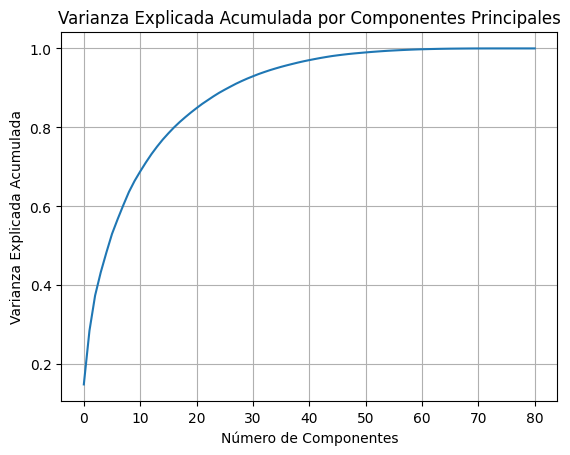

In [20]:
# AUNQUE LA MANERA MAS FACIL DE OBTENERLOS ES EN UNA GRAFICA
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()

# SIGUIENDO LA REGLA DEL CODO, PODRIAMOS VER QUE A PARTIR DE 20 COMPONENTES, ESTAS EXPLICANDO MAS DEL 95 POR CIENTO DE VARIANZA

In [21]:
# AUNQUE SI QUEREMOS ESTAR COMPLETAMENTE SEGUROS, HAY UN METODO QUE NO ES A OJO
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

num_componentes_90 = np.argmax(varianza_explicada_acumulada >= 0.9) + 1  # Encontrar el número de componentes necesarios para alcanzar el 90% de varianza explicada
#+1 porque el índice comienza en 0

print(f"Número de componentes para alcanzar el 90% de varianza explicada: {num_componentes_90}")

Número de componentes para alcanzar el 90% de varianza explicada: 27


In [22]:
# ASI QUE PODEMOS VOLVER A HACERLO, ESTA VEZ CON 27 COMPONENTES
pca = PCA(n_components=27)  
X_pca = pca.fit_transform(X)
# Y YA TENEMOS LOS COMPONENTES PRINCIPALES, PODEMOS EMPEZAR A ANALIZAR DATOS Y TENDENCIAS

In [23]:
# Una vez realizado, PODEMOS OBTENER LOS COMPONENTES PRINCIPALES
X_pca = pca.components_ # LOS COMPONENTES
varianza_explicada = pca.explained_variance_ratio_ # LA VARIANZA EXPLICADA

for i in range(len(varianza_explicada)): # Y ASI PODEMOS VERLOS, AUNQUE LA VISUALIZACION ES REGULAR
    print(f'Componente Principal {i + 1}:')
    print(X_pca[i])
    print(f'Varianza Explicada por el Componente Principal: {varianza_explicada[i]}')
    print()

Componente Principal 1:
[ 0.04055207  0.14521681  0.10333403  0.20361536  0.08184518 -0.01827544
  0.01180979  0.14521681  0.10333403  0.20361536  0.08184518 -0.01827544
  0.01180979 -0.09170408 -0.01188525  0.04454955 -0.03218101 -0.0403085
  0.18257099  0.16522657 -0.06096119 -0.08302883  0.10962304 -0.06401902
  0.04177416  0.04335324  0.04338554  0.02398757  0.15260134  0.14238598
  0.12988069  0.13069708  0.1298954   0.10237202  0.20775504  0.19251456
  0.20100711  0.07452023  0.06994013  0.07049582 -0.02492822 -0.03337829
 -0.03403288  0.01239465  0.01969499  0.01797254  0.15260134  0.14238598
  0.12988069  0.13069708  0.1298954   0.10237202  0.20775504  0.19251456
  0.20100711  0.07452023  0.06994013  0.07049582 -0.02492822 -0.03337829
 -0.03403288  0.01239465  0.01969499  0.01797254 -0.07169943 -0.05476792
 -0.02991283 -0.00271989  0.0009949  -0.0130656   0.06093028  0.07190837
  0.08199099 -0.03600813 -0.03494437 -0.02434855 -0.04716568 -0.05017789
 -0.04820183  0.15607034  0.

In [24]:
# EMPEZARE CREANDO UN DATAFRAME CON MIS PRINCIPAL COMPONENTES DEL DATASET DE CALIDAD
componentes = pd.DataFrame(X_pca)
componentes

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.040552,0.145217,0.103334,0.203615,0.081845,-0.018275,0.011810,0.145217,0.103334,0.203615,...,-0.101585,0.109739,0.106449,0.089643,-0.060021,-0.057861,-0.062729,0.037737,0.029639,0.023510
1,0.009763,0.019870,-0.118917,0.069664,0.154330,0.100546,-0.056013,0.019870,-0.118917,0.069664,...,-0.041101,-0.162163,-0.169446,-0.159699,-0.142439,-0.128300,-0.121639,-0.079423,-0.064094,-0.046831
2,0.074105,0.112608,-0.089747,0.026031,-0.050017,-0.073249,0.067356,0.112608,-0.089747,0.026031,...,0.098495,-0.033334,-0.025879,-0.026026,-0.030463,-0.002146,0.028947,0.167403,0.182238,0.189845
3,0.076104,-0.109969,-0.164984,-0.078397,0.100268,0.125359,0.035432,-0.109969,-0.164984,-0.078397,...,0.058122,-0.055454,0.038550,0.093316,0.011378,0.115252,0.003728,0.010852,0.069855,0.044171
4,0.170826,0.147210,0.126518,0.054655,0.058758,0.095139,0.193778,0.147210,0.126518,0.054655,...,-0.015816,-0.062703,-0.052229,0.016398,0.020019,-0.177969,-0.072360,0.009413,-0.069819,-0.030667
5,0.145362,-0.007055,0.171610,0.066135,0.081497,0.006433,0.259505,-0.007055,0.171610,0.066135,...,0.216399,-0.037028,0.064443,0.090772,-0.260107,-0.023726,0.193666,-0.050851,-0.024565,0.135245
6,-0.024884,-0.052371,-0.072357,-0.108700,-0.032700,-0.036363,0.002046,-0.052371,-0.072357,-0.108700,...,0.031256,0.007826,0.011287,0.028138,0.009229,-0.148445,0.158703,0.020127,0.074032,-0.065838
7,0.110587,-0.010220,0.015428,-0.057637,0.063311,-0.007547,-0.184384,-0.010220,0.015428,-0.057637,...,-0.044577,-0.012235,0.030200,0.076430,0.081815,-0.069336,-0.078730,-0.064612,0.092142,0.043310
8,-0.020570,-0.105876,-0.126341,-0.092073,-0.089285,-0.112492,0.410678,-0.105876,-0.126341,-0.092073,...,-0.102366,0.071044,0.054895,-0.024165,0.006478,-0.001612,-0.230673,0.135945,0.088985,-0.048799
9,0.011158,0.110000,-0.023042,-0.014358,-0.129450,-0.107503,-0.251420,0.110000,-0.023042,-0.014358,...,0.002712,0.064448,-0.018760,0.028046,-0.007324,0.008862,0.062448,0.046623,0.022393,0.000170


In [25]:
# para poder ver la relacion entre mis features originales y mis componentes, 
# usamos los loadings o coeficientes  y creamos un heatmap
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) # se calculan multiplicando las matrices de los componentes principales por la matriz de datos centrados reducidos

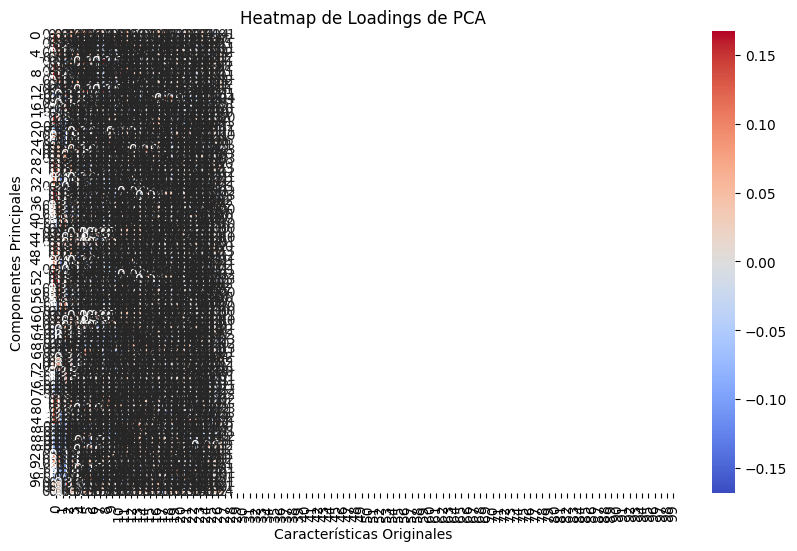

In [26]:
import seaborn as sns
# Y REPRESENTAMOS
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=componentes.columns)
plt.title('Heatmap de Loadings de PCA')
plt.xlabel('Características Originales')
plt.ylabel('Componentes Principales')
plt.show()

In [27]:
# NO SE VE NADA, pero bueno, intentaremos usar X_pca para el train

In [28]:
X_pca.shape

(27, 100)

In [ ]:
# Me disminuye LAS FILAS no las columnas. hay que buscar otro metodo como selektkbest


In [29]:
y.shape

(81,)

In [43]:
# probamos selecktbest
from sklearn.feature_selection import SelectKBest, f_regression
# Instanciar el objeto SelectKBest con la función de puntuación que deseas usar
# En este ejemplo, estamos utilizando f_regression para problemas de regresión
selector = SelectKBest(score_func=f_regression, k=27)  # he puesto 27, porque es lo que nos salio en pca, para probar
selector.fit(X, y)
X_selected = selector.transform(X)
selected_features = selector.get_support() # para elegir las caracteristicas seleccionadas
# luego filtrar las caracteristicas
X_selected = X[:, selected_features]

In [44]:
X_selected.shape

(81, 27)

In [55]:
# PRUEBA LSTM, X, CON SELECTKBEST, PARA REDUCIR DIMENSIONALIDAD Y TENER DIMENSIONES ADECUADAS PARA EL MODELO
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=False)

n_features = 9 # son las features que encajan con la dimensionalidad (64x3x9) para 1728 

# Reformateamos los datos para que sean 3D (número de muestras, número de pasos de tiempo, número de características)
X_train = X_train.reshape(X_train.shape[0], lag_steps, n_features)
X_test = X_test.reshape(X_test.shape[0], lag_steps, n_features)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(lag_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))
loss = model.evaluate(X_test, y_test)
print("Pérdida en conjunto de prueba:", loss)
predictions = model.predict(X_test)

Epoch 1/20
8/8 [==============================] - 1s 26ms/step - loss: 48327671808.0000 - val_loss: 69253292032.0000
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 48327614464.0000 - val_loss: 69253201920.0000
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 48327544832.0000 - val_loss: 69253087232.0000
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 48327450624.0000 - val_loss: 69252907008.0000
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 48327307264.0000 - val_loss: 69252603904.0000
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 48327065600.0000 - val_loss: 69252071424.0000
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 48326656000.0000 - val_loss: 69251055616.0000
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 48325877760.0000 - val_loss: 69249056768.0000
Epoch 9/20
8/8 [==============================] - 0s 6ms/step - loss: 4

In [60]:
# Vamos a intentarlo con Random Forest, usamos X normal
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Error cuadrático medio:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R^2):", r2)
# el error es muy alto, Y EL COEFICIENTE DE DETERMINACION TOTALMENTE NEGATIVO. 


Error cuadrático medio: 1616948913.461533
Root Mean Squared Error (RMSE): 40211.30330468702
Coeficiente de determinación (R^2): -46.587276550682944


In [59]:
# y usando Xselected
from sklearn.feature_selection import SelectKBest, f_regression
# vamos a intentarlo con random forest, pero en lugar del de la pca, usamos X normal
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=False)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Error cuadrático medio:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R^2):", r2)
# el error mejora, SI ES QUE ESTA BIEN HECHO, PERO EL COEFICIENTE DE DETERMINACION ES MUY NEGATIVO.
# generalmente indica que el modelo es peor que simplemente predecir la media de la variable dependiente. En este caso, el modelo XGBoost no está realizando adecuadamente las predicciones 
# en el conjunto de prueba y está teniendo un desempeño significativamente peor que una predicción aleatoria.


Error cuadrático medio: 647584473.9821012
Root Mean Squared Error (RMSE): 25447.681112079765
Coeficiente de determinación (R^2): -18.058599314274453


In [58]:
# CON XGBOOST
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)
predictions = xgb_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R^2):", r2)
# EL ERROR ES ALGO MENOR, PERO SIGUE SIENDO EXAGERADO, algo asi como un 15%, PERO EL COEFICIENTE DE DETERMINACION ES MUY NEGATIVO.
# generalmente indica que el modelo es peor que simplemente predecir la media de la variable dependiente. En este caso, el modelo XGBoost no está realizando adecuadamente las predicciones 
# en el conjunto de prueba y está teniendo un desempeño significativamente peor que una predicción aleatoria.

Root Mean Squared Error (RMSE): 32156.26320094021
Coeficiente de determinación (R^2): -29.431664070155676


In [57]:
# Y CON X SELECTED
# CON XGBOOST
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=False)
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)
predictions = xgb_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R^2):", r2)
# el error tambien mejora, PERO EL COEFICIENTE DE DETERMINACION ES MUY NEGATIVO.
# generalmente indica que el modelo es peor que simplemente predecir la media de la variable dependiente. En este caso, el modelo XGBoost no está realizando adecuadamente las predicciones 
# en el conjunto de prueba y está teniendo un desempeño significativamente peor que una predicción aleatoria.


Root Mean Squared Error (RMSE): 24343.95766166112
Coeficiente de determinación (R^2): -16.441222392319958
